In [162]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging


tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.4


In [163]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [164]:
x_train_val= np.load('/kaggle/input/time-series/x_train.npy')
y_train_val=np.load('/kaggle/input/time-series/y_train.npy')

In [165]:
print("X_train shape",x_train_val.shape)
print("Y_train shape",y_train_val.shape)

X_train shape (2429, 36, 6)
Y_train shape (2429,)


In [166]:
labels={0: "Wish",
1: "Another",
2: "Comfortably",
3: "Money",
4: "Breathe",
5: "Time",
6: "Brain",
7: "Echoes",
8: "Wearing",
9: "Sorrow",
10: "Hey",
11: "Shine"}

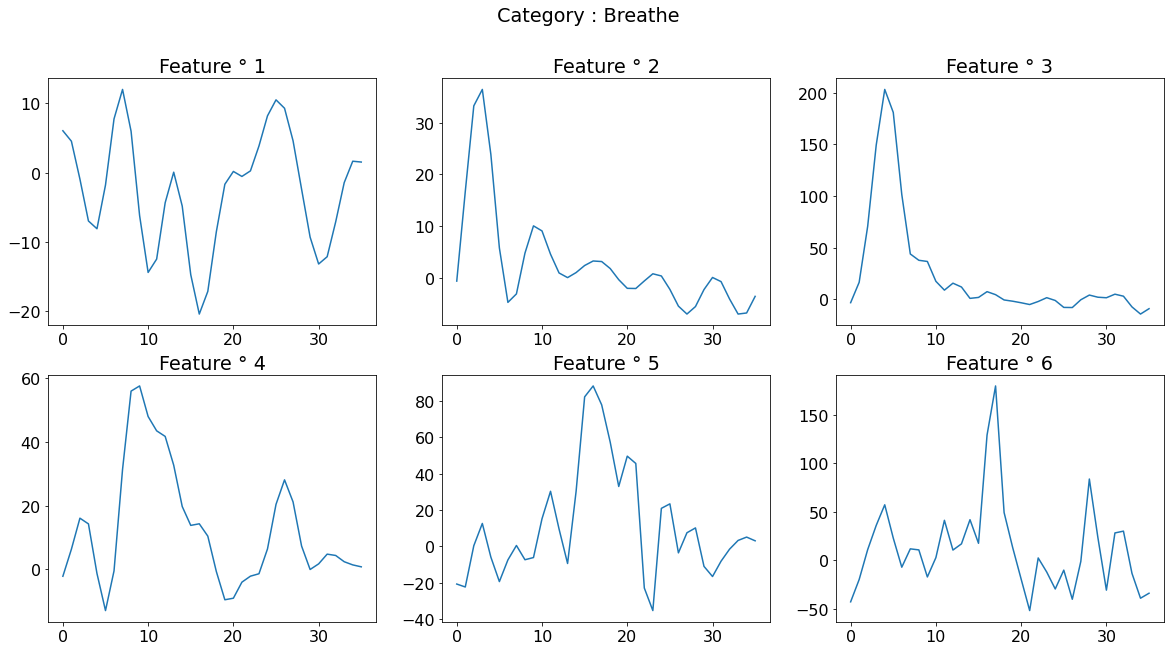

In [167]:
# UNDERSTANDING THE DATA : VISUALIZE

# At first it appears like: the data is represented on 36 pts time series, and for 
# each point of time there is a value for 6 different features; it is then 36 pts 
# time series of 6 different features

def plot_example(random_index, x,y ):
    example=x[random_index]
    example_label=y[random_index]

    n_points=example.shape[0] # 36
    n_features=example.shape[1] # 6

    counter=0
    fig, axs= plt.subplots(2, 3, figsize=(20,10))
    fig.suptitle('Category : '+labels[example_label])
    for i in range(n_features):
        row= counter//3
        col= counter%3
        example_on_ith_feature=example[:,i]
        axs[row,col].set_title('Feature ° '+str(i+1))
        axs[row,col].plot(example_on_ith_feature)
        counter=counter+1




random_index=np.random.randint(0,2428) 
plot_example(random_index,x_train_val,y_train_val)


TOTAL :  2429


<BarContainer object of 12 artists>

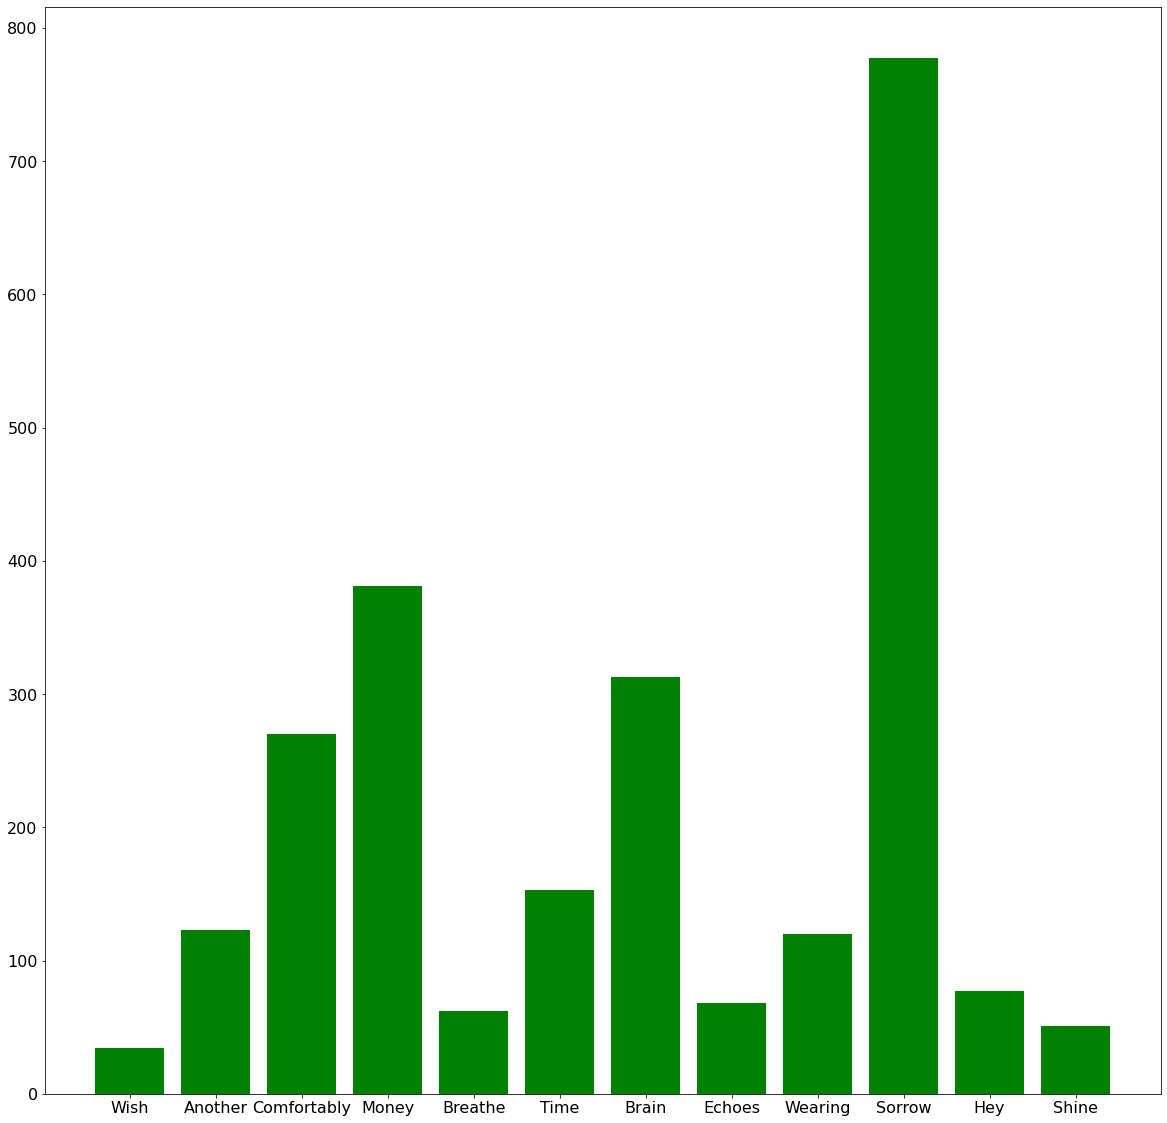

In [168]:
# CLASS REPARTITIONS


class_repartitions={"Wish":0,
"Another":0,
"Comfortably":0,
"Money":0,
"Breathe":0,
"Time":0,
"Brain":0,
"Echoes":0,
"Wearing":0,
"Sorrow":0,
"Hey":0,
"Shine":0}

for y in y_train_val:
    label=labels[y]
    class_repartitions[label]=class_repartitions[label]+1
    
S=0
for key in class_repartitions:
    S=S+class_repartitions[key]


print("TOTAL : ",S)
plt.figure(figsize=(20,20))
plt.bar(class_repartitions.keys(), class_repartitions.values(), color='g')


# ===> UNBALANCED DATASET

In [171]:
n_total=x_train_val.shape[0]
n_classes=12


class_loss_weights = {
    class_number: (1 / class_repartitions[labels[class_number]]) * (n_total / 12) for class_number in range(12)
}*

class_loss_weights

{0: 5.953431372549019,
 1: 1.6456639566395665,
 2: 0.7496913580246913,
 3: 0.5312773403324584,
 4: 3.264784946236559,
 5: 1.3229847494553377,
 6: 0.6466986155484558,
 7: 2.9767156862745097,
 8: 1.6868055555555554,
 9: 0.2605105105105105,
 10: 2.628787878787879,
 11: 3.9689542483660127}

In [172]:
# WORKING THE DATA IN AMOUNT

In [ ]:
# PREPROCESSING

In [ ]:
# Studiying each feature/variable separately (statistics, distribution, boxplots ...)

In [ ]:
# Taking outliers into account for scaling : ROBUST SCALER !!!!

In [173]:
# Normalizing x_train with MinMaxscaling

min_features=[0,0,0,0,0,0]
#list of the minimums on the entire dataset for each feature (from 1st to 6th)

max_features=[0,0,0,0,0,0]
#list of the maximums on the entire dataset for each feature (from 1st to 6th)

n_features=6
n_instances=len(x_train_val)
n_pts_by_instance=36

for i in range(n_features):
    x_train_unrolled_on_feature_i=[]
    for k in range(n_instances):
        for q in range (n_pts_by_instance):
            x_train_unrolled_on_feature_i.append(x_train_val[k,q,i])       
    min_features[i]=min(x_train_unrolled_on_feature_i)
    max_features[i]=max(x_train_unrolled_on_feature_i)
        
# ===> We now have lists of the minimums and the maximums on whole dataset for each 
# feature

In [174]:
# MinMaxScaling

def MinMaxScaling(x):
    
    x_normalized=x.copy()
    n_features=6
    n_instances=len(x)
    n_pts_by_instance=36
    for i in range(n_features):
        for k in range(n_instances):
            for q in range (n_pts_by_instance):
                minimum=min_features[i]
                maximum=max_features[i]
                x_normalized[k,q,i]= (x_normalized[k,q,i]-minimum)/(maximum-minimum)
                
    return x_normalized

x_train_val_normalized=MinMaxScaling(x_train_val)

ORIGINAL :


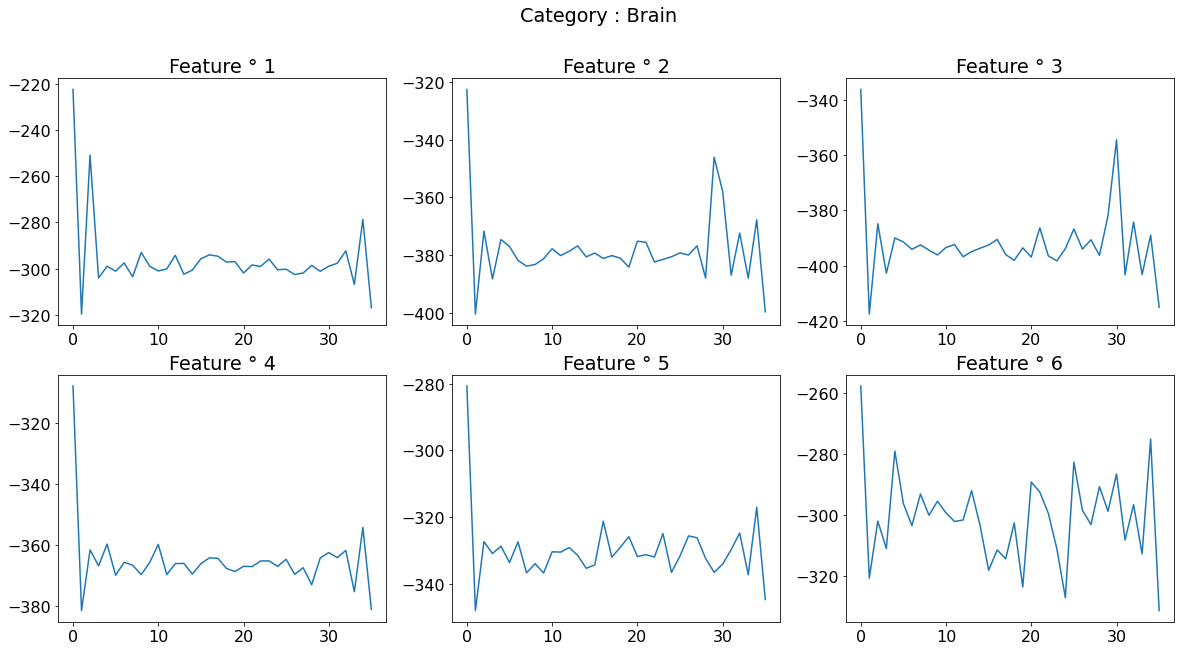

In [175]:
# Verification of the method coherence

random_index=np.random.randint(0,2428) 

print("ORIGINAL :")
plot_example(random_index,x_train_val,y_train_val)

NORMALIZED :


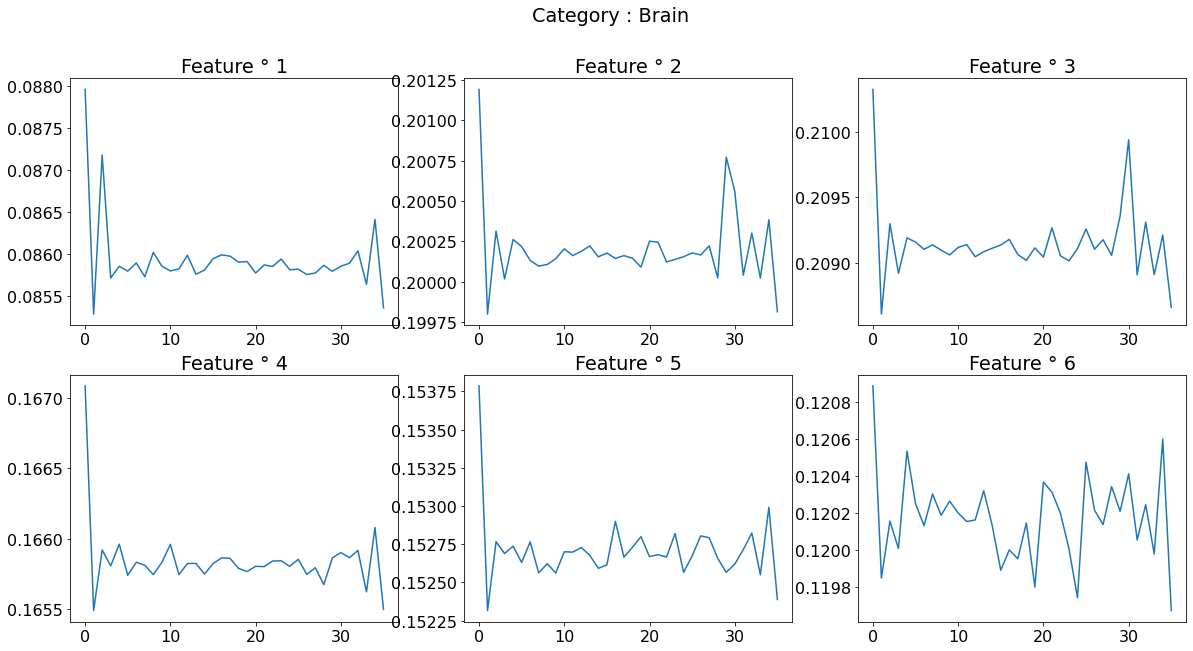

In [176]:
print("NORMALIZED :")
plot_example(random_index,x_train_val_normalized,y_train_val)

In [177]:
for i in range(6):
    m=np.mean(x_train_val_normalized[:,:,i])
    std=np.std(x_train_val_normalized[:,:,i])
    print(m," ",std, " ",100*(std/m),"%")
    
    
# ====> PROBLEM : OUTLIERS !!! INTRODUCE HUGE BIAS IN MINMAXSCALING!!!

0.09434340265026941   0.006885455844986583   7.298290767093634 %
0.2072731354965759   0.013873662365609734   6.693420414744931 %
0.21799055391283598   0.01477329860574491   6.777036133250089 %
0.1744683148478199   0.014791803246816023   8.478217526040863 %
0.1606508287193345   0.014611303978146665   9.095069160006256 %
0.12566116459455637   0.012047939904650095   9.58763985955611 %


In [178]:
# SPLITTING

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size = 0.1, random_state=seed,stratify= y_train_val )

In [179]:
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(2186, 36, 6) (243, 36, 6)
(2186,) (243,)


In [ ]:
# Checking repartitions after split, to see if it conserves repartition 

TRAINING SPLIT REPARTITION
TOTAL :  2186


<BarContainer object of 12 artists>

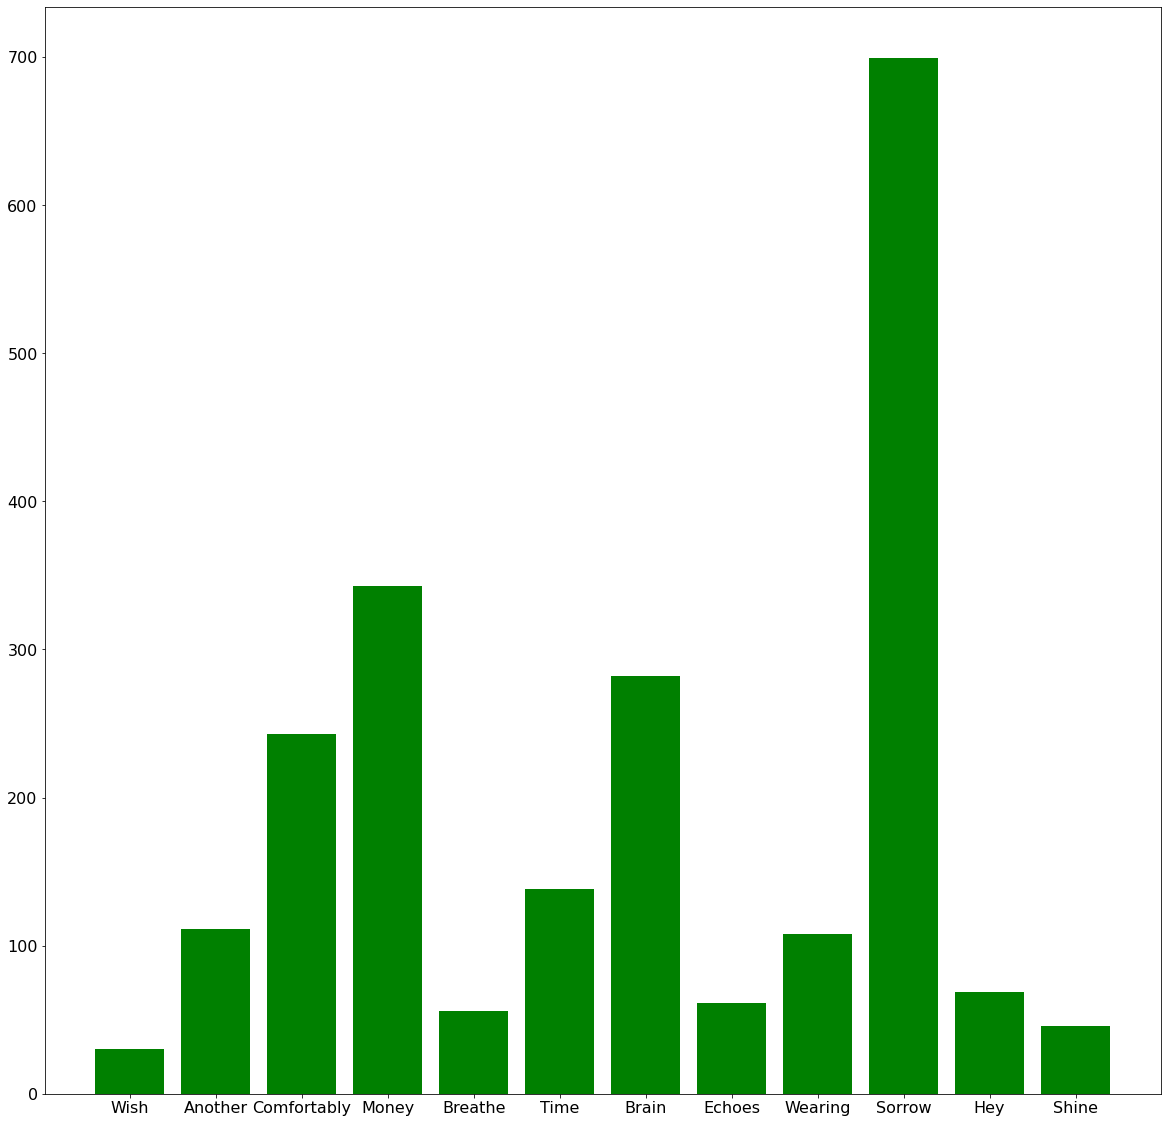

In [180]:
train_class_repartitions={"Wish":0,
"Another":0,
"Comfortably":0,
"Money":0,
"Breathe":0,
"Time":0,
"Brain":0,
"Echoes":0,
"Wearing":0,
"Sorrow":0,
"Hey":0,
"Shine":0}

for y in y_train:
    label=labels[y]
    train_class_repartitions[label]=train_class_repartitions[label]+1
    
S=0
for key in train_class_repartitions:
    S=S+train_class_repartitions[key]

print( "TRAINING SPLIT REPARTITION")
print("TOTAL : ",S)
plt.figure(figsize=(20,20))
plt.bar(train_class_repartitions.keys(), train_class_repartitions.values(), color='g')

VALIDATION SPLIT REPARTITION
TOTAL :  243


<BarContainer object of 12 artists>

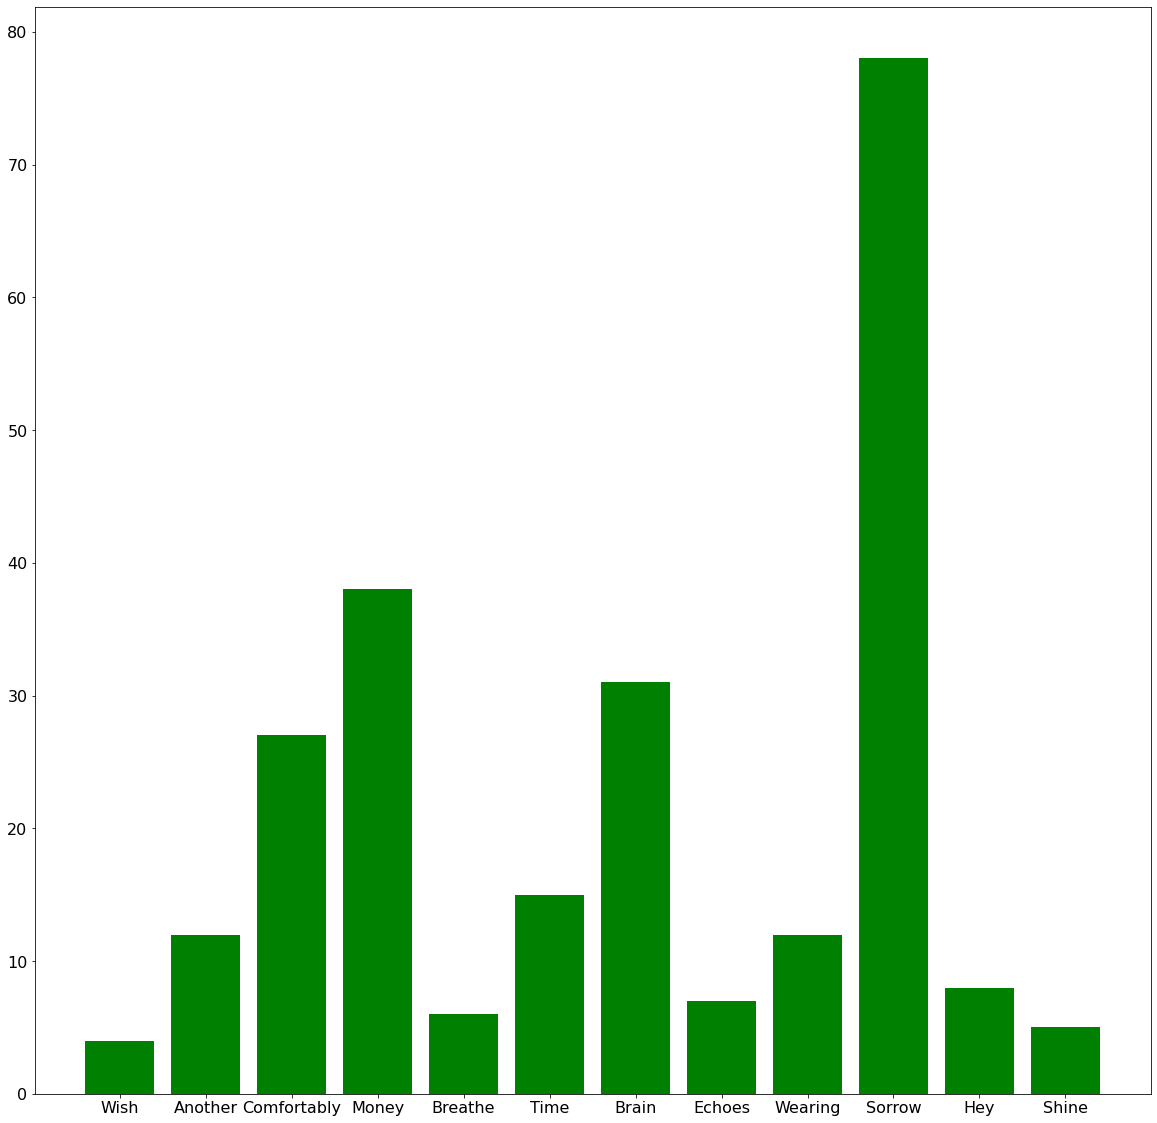

In [182]:
val_class_repartitions={"Wish":0,
"Another":0,
"Comfortably":0,
"Money":0,
"Breathe":0,
"Time":0,
"Brain":0,
"Echoes":0,
"Wearing":0,
"Sorrow":0,
"Hey":0,
"Shine":0}

for y in y_val:
    label=labels[y]
    val_class_repartitions[label]=val_class_repartitions[label]+1
    
S=0
for key in val_class_repartitions:
    S=S+val_class_repartitions[key]

print( "VALIDATION SPLIT REPARTITION")
print("TOTAL : ",S)
plt.figure(figsize=(20,20))
plt.bar(val_class_repartitions.keys(), val_class_repartitions.values(), color='g')

In [183]:
# Encoding target variable

y_train_categorical = tfk.utils.to_categorical(y_train)
y_val_categorical =  tfk.utils.to_categorical(y_val)

print(y_train_categorical.shape,y_val_categorical.shape )

(2186, 12) (243, 12)


In [45]:
# MODEL BUILDING

In [184]:
input_shape = x_train.shape[1:]
classes = y_train_categorical.shape[-1]
batch_size = 128
epochs = 200

In [185]:
def basic_LSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    lstm = tfkl.LSTM(128, return_sequences=True)(input_layer)
    lstm2 = tfkl.LSTM(128)(lstm)
    dropout = tfkl.Dropout(.5, seed=seed)(lstm2)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [186]:
model = basic_LSTM_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 36, 6)]           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 36, 128)           69120     
_________________________________________________________________
lstm_23 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 12)                1548      
Total params: 218,764
Trainable params: 218,764
Non-trainable params: 0
_______________________________________________________

In [ ]:
# TRAINING PHASE

In [188]:
# Train the model
history = model.fit(
    x = x_train,
    y = y_train_categorical,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=(x_val, y_val_categorical),
     callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=10, factor=0.5, min_lr=1e-5)
    ],
    class_weight=class_loss_weights
   
).history

Epoch 1/200
18/18 [==============================] - 8s 204ms/step - loss: 2.3740 - accuracy: 0.1528 - val_loss: 2.2034 - val_accuracy: 0.2716
Epoch 2/200
18/18 [==============================] - 3s 147ms/step - loss: 1.9674 - accuracy: 0.2626 - val_loss: 1.9283 - val_accuracy: 0.2593
Epoch 3/200
18/18 [==============================] - 3s 151ms/step - loss: 1.6363 - accuracy: 0.2800 - val_loss: 1.7619 - val_accuracy: 0.2675
Epoch 4/200
18/18 [==============================] - 3s 147ms/step - loss: 1.4128 - accuracy: 0.3605 - val_loss: 1.7869 - val_accuracy: 0.2922
Epoch 5/200
18/18 [==============================] - 3s 146ms/step - loss: 1.2617 - accuracy: 0.3898 - val_loss: 1.5780 - val_accuracy: 0.3251
Epoch 6/200
18/18 [==============================] - 3s 145ms/step - loss: 1.1271 - accuracy: 0.4071 - val_loss: 1.6384 - val_accuracy: 0.2757
Epoch 7/200
18/18 [==============================] - 3s 149ms/step - loss: 1.1714 - accuracy: 0.3554 - val_loss: 1.5989 - val_accuracy: 0.3169